In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Constants
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, CHANNELS)
EPOCHS = 100

# Define CNN Model
model = models.Sequential([
    # Rescaling
    layers.Rescaling(1./255, input_shape=INPUT_SHAPE),
    
    # Data Augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Conv Layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Smaller LR for better stability
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

C:\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,629,953 (32.92 MB)

 Trainable params: 8,629,953 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import os
# Define dataset path
dataset_path = r"G:\FARM_PROJECT\farm-Drowssiness_Detection\training\Datasets"  # Update this path

# Verify if dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Directory not found: {dataset_path}")

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',  # Automatically assigns labels based on folder names (0, 1)
    label_mode='int',   # Labels will be integers (0 and 1)
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)

# Get class names
class_names = dataset.class_names
print(f"Class names: {class_names}")  # Should print: ['0', '1']

# Function to split dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

# Split dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(f"Training Dataset: {len(train_ds)} batches, {len(train_ds) * BATCH_SIZE} images")
print(f"Validation Dataset: {len(val_ds)} batches, {len(val_ds) * BATCH_SIZE} images")
print(f"Test Dataset: {len(test_ds)} batches, {len(test_ds) * BATCH_SIZE} images")

Found 2400 files belonging to 2 classes.
Class names: ['drowssy', 'non_drowssy']
Training Dataset: 60 batches, 1920 images
Validation Dataset: 7 batches, 224 images
Test Dataset: 8 batches, 256 images


In [3]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,  # ✅ Fix: Use "validation_data=" instead of "val_ds,"
    callbacks=[lr_scheduler],  # ✅ No syntax issue here
)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.5956 - loss: 0.6517 - val_accuracy: 0.6964 - val_loss: 0.5876 - learning_rate: 1.0000e-04
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6737 - loss: 0.5894 - val_accuracy: 0.7455 - val_loss: 0.5286 - learning_rate: 1.0000e-04
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7366 - loss: 0.5310 - val_accuracy: 0.6696 - val_loss: 0.5336 - learning_rate: 1.0000e-04
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7443 - loss: 0.4989 - val_accuracy: 0.8661 - val_loss: 0.3686 - learning_rate: 1.0000e-04
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7904 - loss: 0.4087 - val_accuracy: 0.8661 - val_loss: 0.3610 - learning_rate: 1.0000e-04
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8270 - loss: 0.3375 - val_accuracy: 0.8304 - val_loss: 0.2987 - learning_rate: 1.0000e-04
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 

In [5]:
accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 256ms/step - accuracy: 0.9707 - loss: 0.0661
Test Accuracy: 95.70%


In [4]:
import os

# Define the model path
model_version = 1
model_dir = "../models"
model_path = f"{model_dir}/DDD_M-{model_version}.keras"

# ✅ Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(model_path)
print(f"✅ Model saved at: {model_path}")

✅ Model saved at: ../models/DDD_M-1.keras


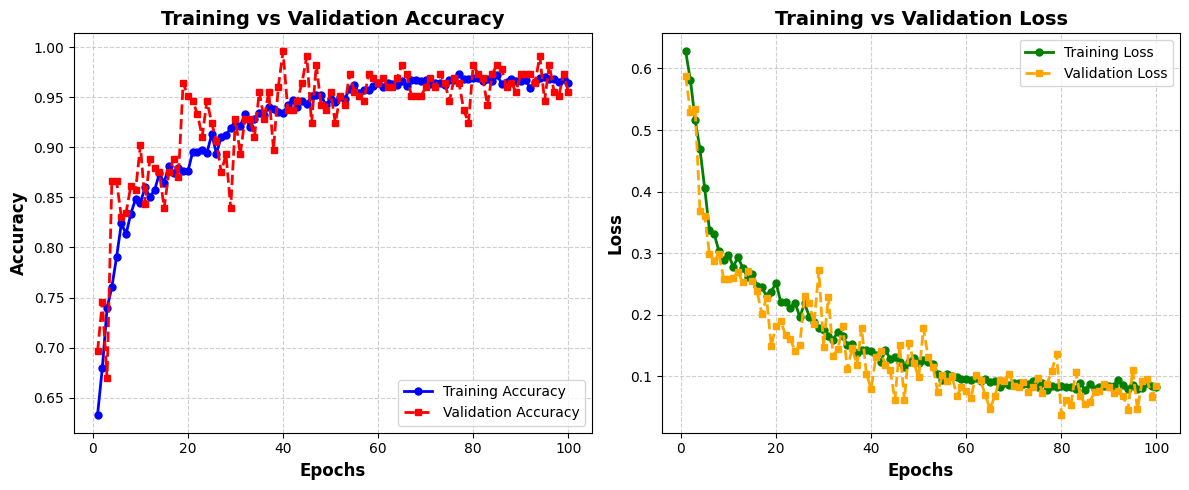

In [7]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Get the actual number of epochs

plt.figure(figsize=(12, 5))  # Wider figure for better readability

# 📈 Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📉 Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss', color='green', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Loss", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


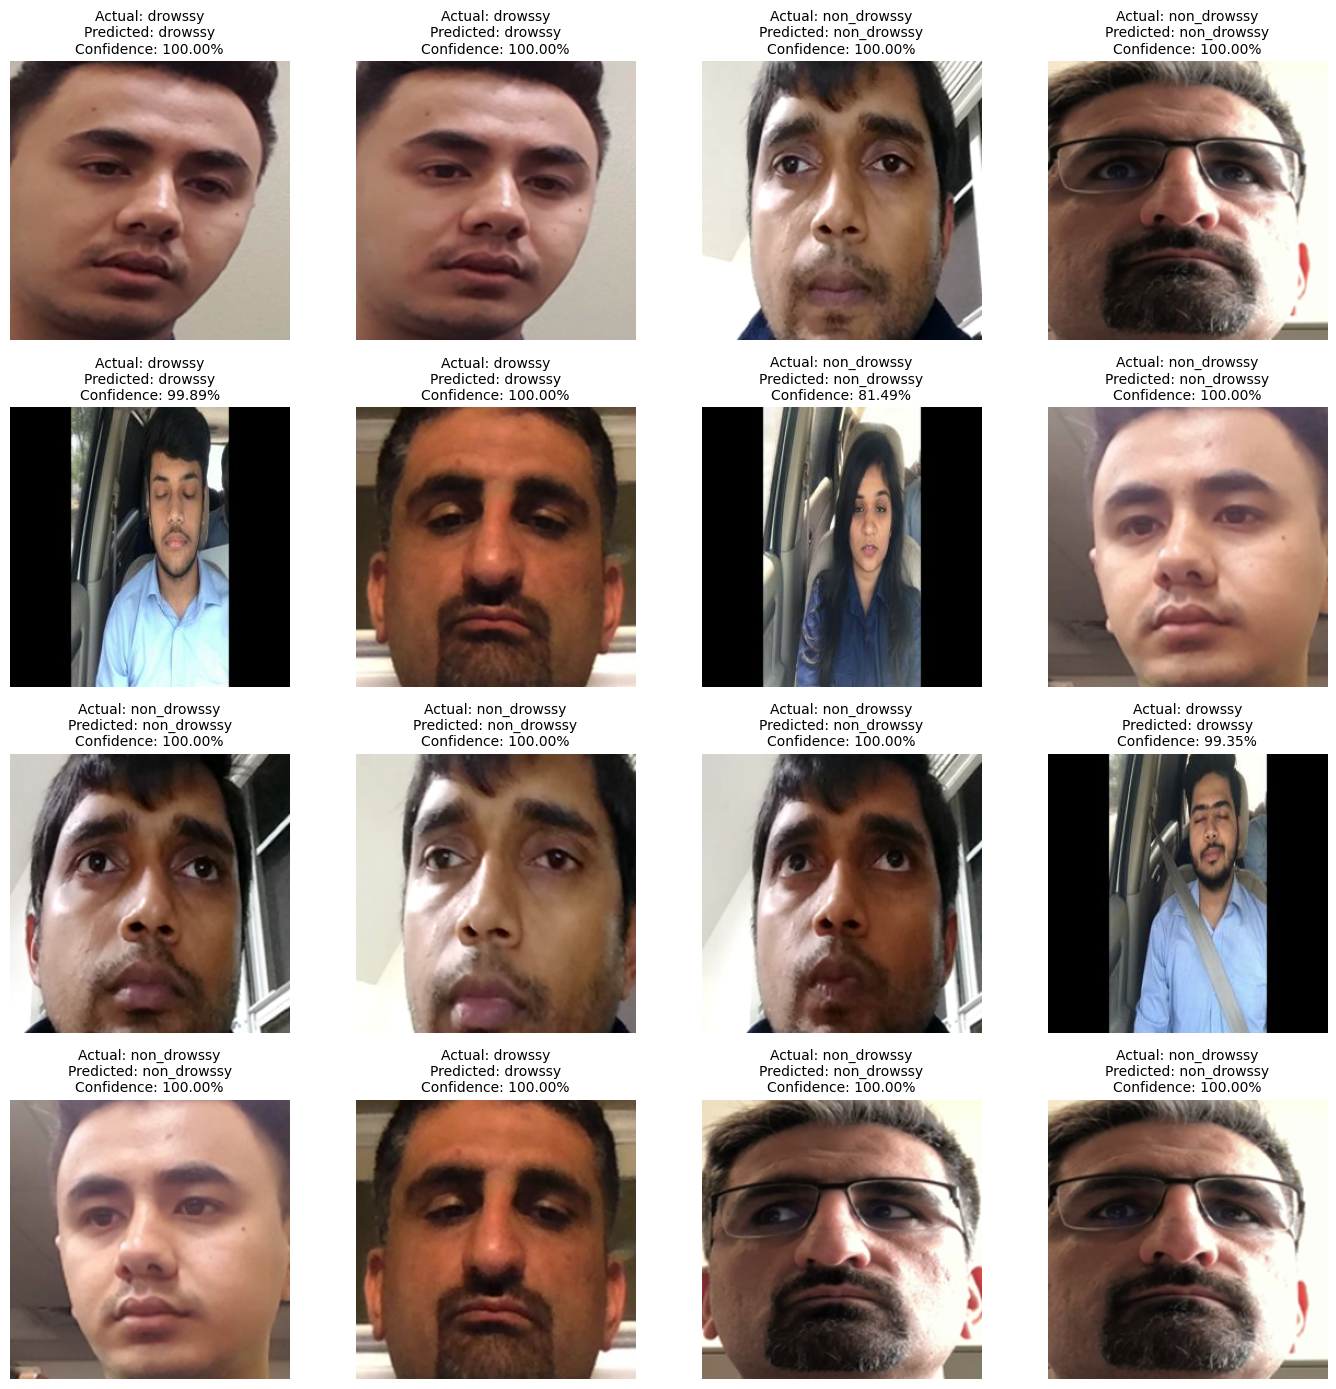

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict class and confidence
def predict(model, image, class_names):
    image = np.expand_dims(image.numpy(), axis=0)  # Expand dimensions for batch shape
    prediction = model.predict(image)[0]  # Get prediction for a single image

    # Handle binary classification (Sigmoid) and multi-class classification (Softmax)
    if prediction.shape == (1,):  # Binary classification case
        prediction_value = prediction.item()  # Extract scalar value
        confidence = max(prediction_value, 1 - prediction_value) * 100  # Convert to percentage
        predicted_class = int(prediction_value > 0.5)  # Threshold for binary classification
    else:  # Multi-class classification case
        confidence = float(np.max(prediction)) * 100  # Max probability as confidence
        predicted_class = np.argmax(prediction)  # Class with highest probability

    return class_names[predicted_class], confidence

# Plot predictions for 16 images (4x4 grid)
plt.figure(figsize=(14, 14))

for images, labels in test_ds.take(1):  # Take one batch from test dataset
    for i in range(16):  # Display 16 images
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to uint8 and show image

        # Predict class and confidence
        predicted_class, confidence = predict(model, images[i], class_names)
        actual_class = class_names[labels[i].numpy()]  # Convert label tensor to class name

        # Set title without emojis (to avoid font issues)
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", 
                  fontsize=10, color="black")
        plt.axis("off")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,889,861 (98.76 MB)

 Trainable params: 8,629,953 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,259,908 (65.84 MB)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Constants
IMG_SIZE = 256
BATCH_SIZE = 32
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
EPOCHS = 50

# Load base model
base_model = MobileNetV2(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model initially

# Build model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=INPUT_SHAPE),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6768\926937762.py:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Define model checkpoint to save the best model
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [15]:

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Transfer Learning Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.9384 - loss: 0.1649 
Epoch 1: val_loss improved from inf to 0.07241, saving model to best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 817ms/step - accuracy: 0.9387 - loss: 0.1646 - val_accuracy: 0.9955 - val_loss: 0.0724
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.9512 - loss: 0.1308 
Epoch 2: val_loss improved from 0.07241 to 0.06821, saving model to best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 790ms/step - accuracy: 0.9512 - loss: 0.1309 - val_accuracy: 0.9911 - val_loss: 0.0682
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.9622 - loss: 0.1262 
Epoch 3: val_loss did not improve from 0.06821
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 792ms/step - accuracy: 0.9623 - loss: 0.1261 - val_accuracy: 0.9777 - val_loss: 0.0717
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9643 - loss: 0.1186 
Epoch 4: val_loss improved from 0.06821 to 0.06066, saving model to best_model.keras


In [16]:
from tensorflow.keras.models import load_model

# Save final model in the recommended .keras format
model.save('final_drowsiness_model.keras')

# Later, to load:
# model = load_model('final_drowsiness_model.keras')


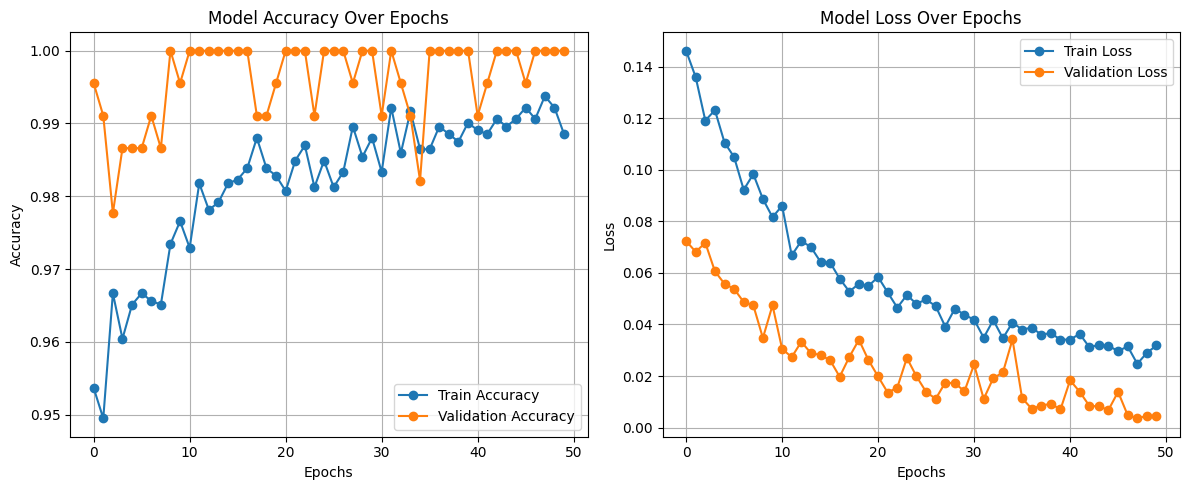

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
!pip install scikit-learn


  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 4.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 4.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 5.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 5.1 MB/s eta 0:00:01
   -----------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import numpy as np
import os

# Combined path
test_dir = r"G:\FARM_PROJECT\farm-Drowssiness_Detection\training\Test"

# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)


Found 1006 files belonging to 2 classes.


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

C:\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 756ms/step

📄 Classification Report:

              precision    recall  f1-score   support

  Non-Drowsy       1.00      0.88      0.94       377
      Drowsy       0.93      1.00      0.96       629

    accuracy                           0.95      1006
   macro avg       0.97      0.94      0.95      1006
weighted avg       0.96      0.95      0.95      1006



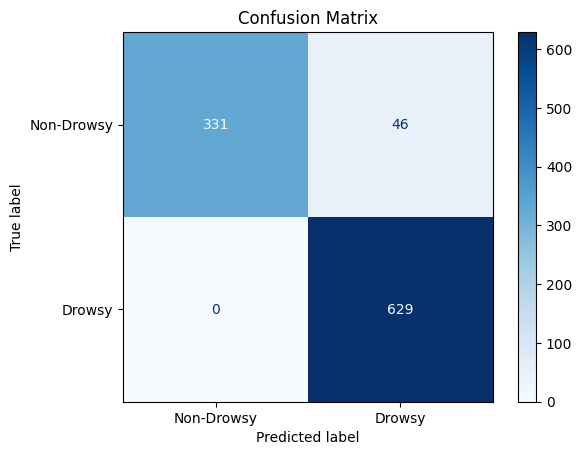

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
# Get true labels
y_true = np.concatenate([labels.numpy() for _, labels in test_ds], axis=0)
model = load_model('final_drowsiness_model.keras')
# Get predictions
y_pred_probs = model.predict(test_ds)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Classification report
print("\n📄 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Non-Drowsy", "Drowsy"]))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Drowsy", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


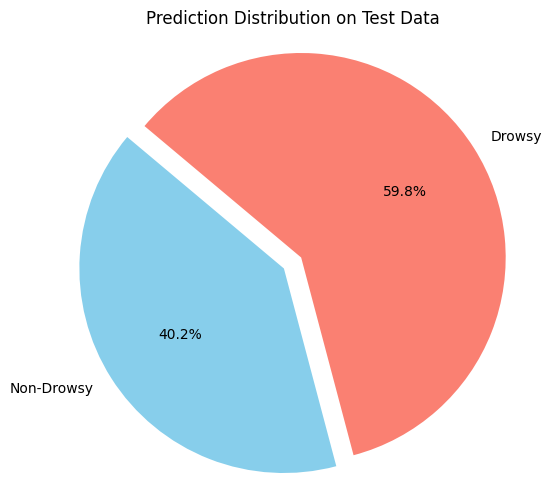

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred_classes contains 0 for Non-Drowsy and 1 for Drowsy
# Replace this line with actual predicted classes if not already done
# y_pred_classes = model.predict_classes(X_test) or np.argmax(model.predict(X_test), axis=1) for multi-class

non_drowsy_count = np.sum(y_pred_classes == 0)
drowsy_count = np.sum(y_pred_classes == 1)

plt.figure(figsize=(6, 6))
plt.pie([non_drowsy_count, drowsy_count],
        labels=['Non-Drowsy', 'Drowsy'],
        autopct='%1.1f%%',
        colors=['skyblue', 'salmon'],
        startangle=140,
        explode=(0.05, 0.05))
plt.title('Prediction Distribution on Test Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [9]:
# Load the trained model
model_path = "G:/FARM_PROJECT/farm-Drowssiness_Detection/Fastapi/Modals/final_drowsiness_model.keras"
model = tf.keras.models.load_model(model_path, compile=False)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
print(img.shape, img.dtype, np.min(img), np.max(img))


(1, 256, 256, 3) float32 0.0 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


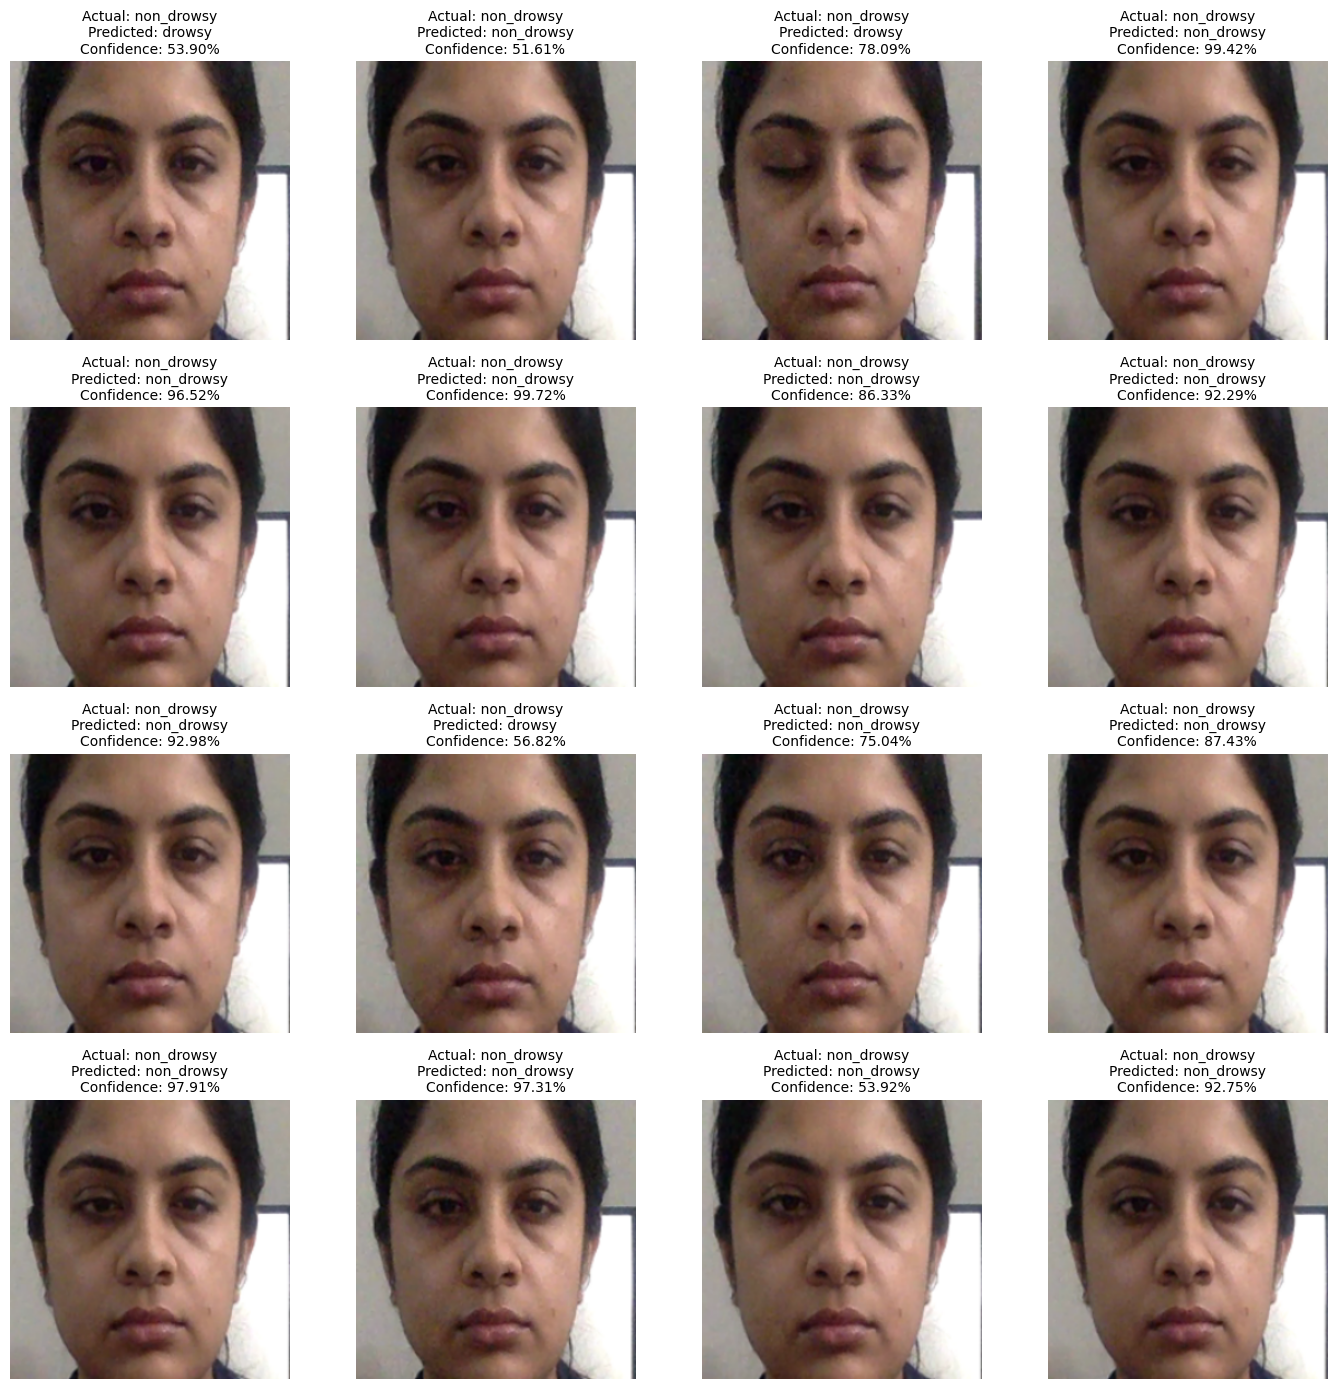

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class_names = ["non_drowsy", "drowsy"]

# Load your trained model
model_path = "G:/FARM_PROJECT/farm-Drowssiness_Detection/Fastapi/Modals/final_drowsiness_model.keras"
model = tf.keras.models.load_model(model_path, compile=False)

# Prediction function
def predict(model, image, class_names):
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)[0]

    # Binary classification
    if prediction.shape == (1,):
        prediction_value = prediction.item()
        confidence = max(prediction_value, 1 - prediction_value) * 100
        predicted_class = int(prediction_value > 0.5)
    else:
        confidence = float(np.max(prediction)) * 100
        predicted_class = np.argmax(prediction)

    return class_names[predicted_class], confidence

# Plot 16 images
plt.figure(figsize=(14, 14))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i], class_names)
        actual_class = class_names[int(labels[i].numpy().item())]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", 
                  fontsize=10, color="black")
        plt.axis("off")

plt.tight_layout()
plt.show()


In [19]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random

# === CONFIGURATION ===
MODEL_PATH = "G:/FARM_PROJECT/farm-Drowssiness_Detection/Fastapi/Modals/final_drowsiness_model.keras"
TEST_BASE_DIR = "G:/FARM_PROJECT/farm-Drowssiness_Detection/training/Test"
DROWSY_DIR = os.path.join(TEST_BASE_DIR, "drowssy")
NON_DROWSY_DIR = os.path.join(TEST_BASE_DIR, "non_drowssy")
IMAGE_SIZE = (256, 256)
NUM_IMAGES_PER_CLASS = 15


# === MODEL LOADING ===
def load_model(model_path):
    try:
        model = tf.keras.models.load_model(model_path, compile=False)
        print(f"✅ Model loaded from: {model_path}")
        return model
    except Exception as e:
        print(f"❌ Failed to load model from {model_path}")
        print(f"Error: {e}")
        return None


# === IMAGE PREPROCESSING ===
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Could not read image: {img_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMAGE_SIZE)
    img = img.astype(np.float32)  # No normalization if model was trained on raw values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


# === IMAGE COLLECTION ===
def collect_random_images(folder_path, count=15):
    image_paths = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    if not image_paths:
        print(f"⚠️ No images found in {folder_path}")
    return random.sample(image_paths, min(count, len(image_paths)))


# === MAIN EXECUTION ===
def main():
    model = load_model(MODEL_PATH)
    if model is None:
        return

    print("📦 Collecting images...")
    drowsy_images = collect_random_images(DROWSY_DIR, NUM_IMAGES_PER_CLASS)
    non_drowsy_images = collect_random_images(NON_DROWSY_DIR, NUM_IMAGES_PER_CLASS)

    # Combine and label
    all_images = [(img, "Drowsy") for img in drowsy_images] + \
                 [(img, "Non-Drowsy") for img in non_drowsy_images]
    random.shuffle(all_images)

    print(f"🖼️ Total images to predict: {len(all_images)}")
    results = []

    # Prediction loop
    for img_path, true_label in all_images:
        img = preprocess_image(img_path)
        if img is None:
            continue

        prediction = model.predict(img, verbose=0)[0][0]
        predicted_label = "Non-Drowsy" if prediction >= 0.5 else "Drowsy"
        results.append({
            'image': os.path.basename(img_path),
            'folder': true_label,
            'prediction': predicted_label,
            'raw_prediction': prediction
        })

    # Display results
    print("\n📊 Prediction Results:\n")
    for res in results:
        print(f"Folder: {res['folder']:11} | Image: {res['image']:25} "
              f"| Predicted: {res['prediction']:12} | Raw Score: {res['raw_prediction']:.6f}")


if __name__ == "__main__":
    main()


✅ Model loaded from: G:/FARM_PROJECT/farm-Drowssiness_Detection/Fastapi/Modals/final_drowsiness_model.keras
📦 Collecting images...
🖼️ Total images to predict: 30

📊 Prediction Results:

Folder: Drowsy      | Image: ZC1135.png                | Predicted: Drowsy       | Raw Score: 0.108558
Folder: Non-Drowsy  | Image: zc1510.png                | Predicted: Non-Drowsy   | Raw Score: 0.957446
Folder: Non-Drowsy  | Image: zc1377.png                | Predicted: Non-Drowsy   | Raw Score: 0.955060
Folder: Non-Drowsy  | Image: zc1338.png                | Predicted: Non-Drowsy   | Raw Score: 0.987481
Folder: Non-Drowsy  | Image: zc1075.png                | Predicted: Non-Drowsy   | Raw Score: 0.985382
Folder: Non-Drowsy  | Image: zc1625.png                | Predicted: Non-Drowsy   | Raw Score: 0.956781
Folder: Drowsy      | Image: ZC1008.png                | Predicted: Drowsy       | Raw Score: 0.454473
Folder: Drowsy      | Image: ZC1196.png                | Predicted: Drowsy       | Raw Score: